<a href="https://colab.research.google.com/github/DebugDuchess28/SiriAIML/blob/main/FoodHub_Data_Analysis_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [457]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install nbconvert

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [458]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import warnings

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [459]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [460]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")





Dataset loaded successfully!
Shape: (1898, 9)


In [461]:
# looking at head (5 observations)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [462]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [464]:
df.isnull().sum()

mode_rating = df[df['rating'] != 'Not given']['rating'].mode()[0]
df['rating'] = df['rating'].replace('Not given', mode_rating)

# Median Imputation
median_value = df['delivery_time'].median()
df['delivery_time'] = df['delivery_time'].fillna(median_value)

In [465]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [466]:
df.describe().T






,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Question 5:** How many orders are not rated? [1 mark]

In [467]:
total_orders = len(df)
unrated_orders = df['rating'].isnull().sum()
percentage_unrated = (unrated_orders / total_orders) * 100

print(f"Total orders: {total_orders}")
print(f"Unrated orders: {unrated_orders}")
print(f"Percentage unrated: {percentage_unrated:.1f}%")

Total orders: 1898
Unrated orders: 0
Percentage unrated: 0.0%


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Let us first explore the numerical variables.**

### Observations on order_id

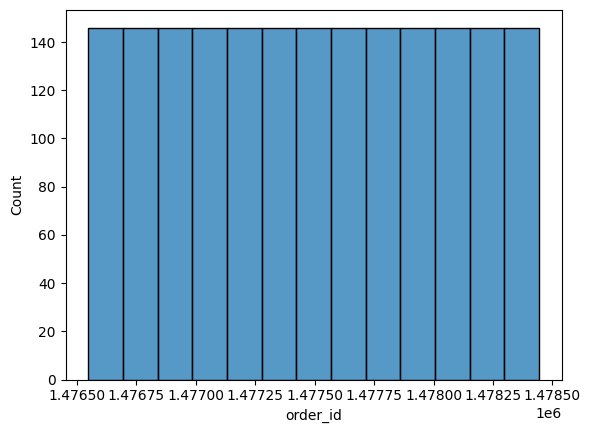

In [468]:

sns.histplot(data=df,x='order_id')
plt.show()


### Observations on customer_id

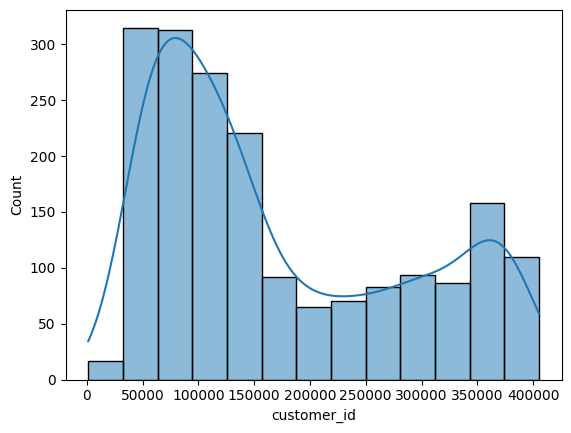

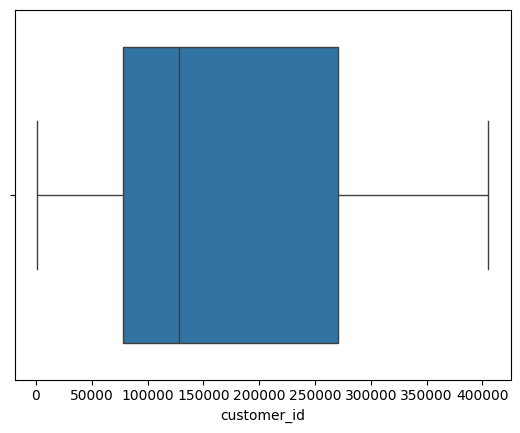

In [469]:

sns.histplot(data=df,x='customer_id', kde=True)
plt.show()
sns.boxplot(data=df,x='customer_id')
plt.show()

### Observations on cost_of_the_order

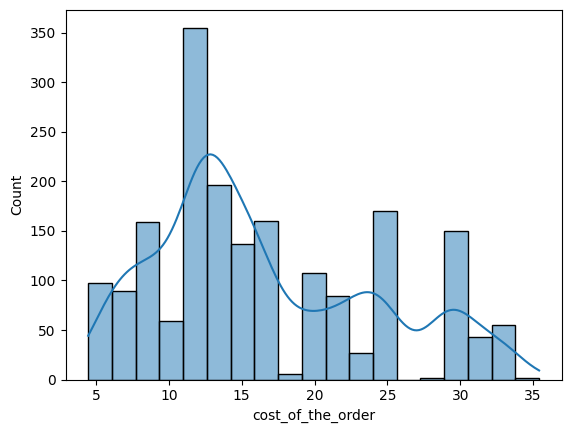

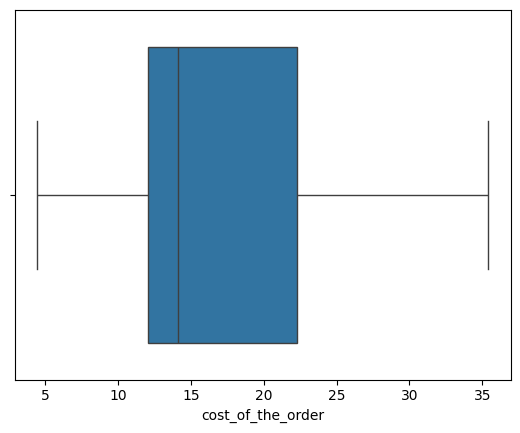

In [470]:

sns.histplot(data=df,x='cost_of_the_order', kde= True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()


*Average cost: $16.50*

*Median cost: $14.14*

*Minimum cost: $4.47*

*Maximum cost: $35.41*

### 3. Observations on rating


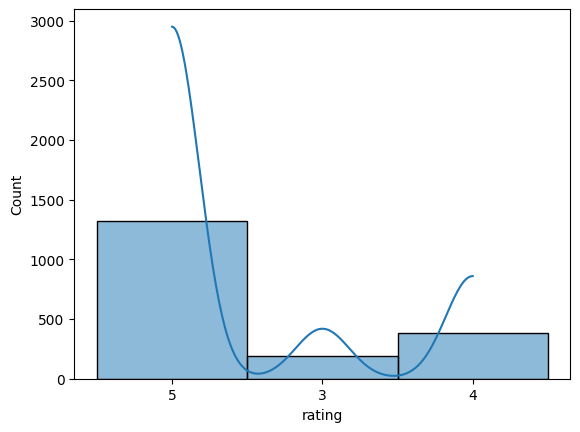

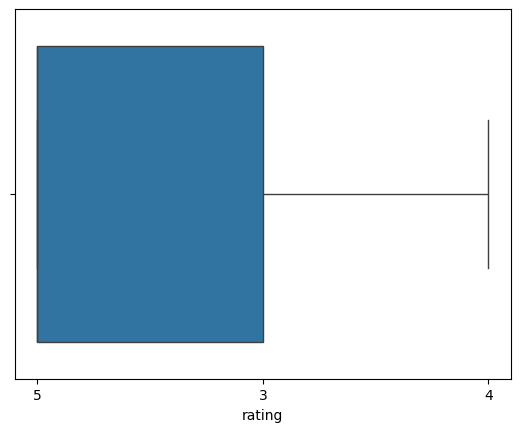

Rating breakdown:
  5: 1324 orders (69.8%)
  4: 386 orders (20.3%)
  3: 188 orders (9.9%)


In [471]:
sns.histplot(data=df,x='rating', kde= True)
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()


rating_counts = df['rating'].value_counts()

print("Rating breakdown:")
for rating, count in rating_counts.items():
    percentage = count / len(df) * 100
    print(f"  {rating}: {count} orders ({percentage:.1f}%)")

### Observation on food_preparation_time

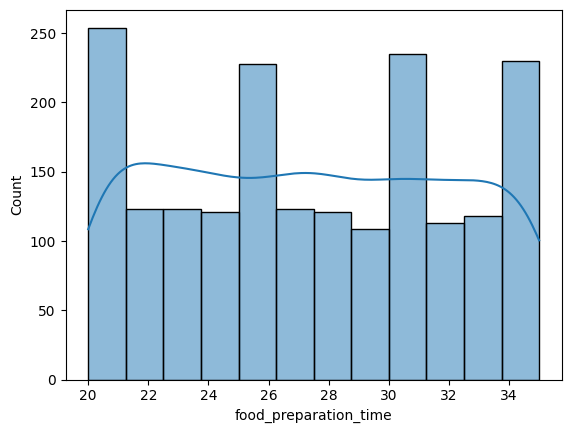

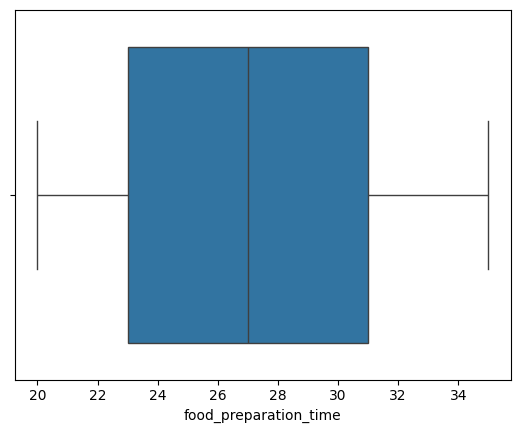

In [472]:
sns.histplot(data=df,x='food_preparation_time', kde= True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()


*Average prep time: 27.4 minutes*

*Minimum prep time: 20 minutes*

*Maximum prep time: 35 minutes*

### Observation on delivery_time

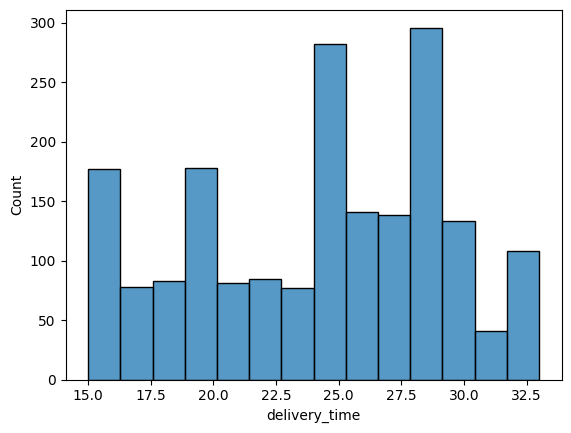

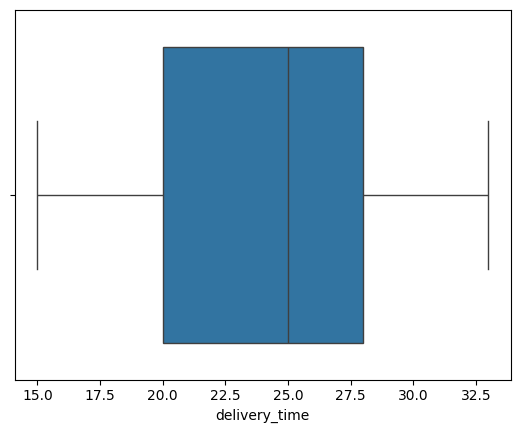

In [473]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()


*Average delivery time: 24.2 minutes*

*Minimum delivery time: 15 minutes*

*Maximum delivery time: 33 minutes*

### Let's now explore the Categorical columns.

### Observation on Restaurants by number of orders

Top 25 Restaurants by Number of Orders:
restaurant_name
Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Sushi of Gari 46                          37
Rubirosa                                  37
Momoya                                    30
Five Guys Burgers and Fries               29
Blue Ribbon Sushi Izakaya                 29
Tamarind TriBeCa                          27
Bareburger                                27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23

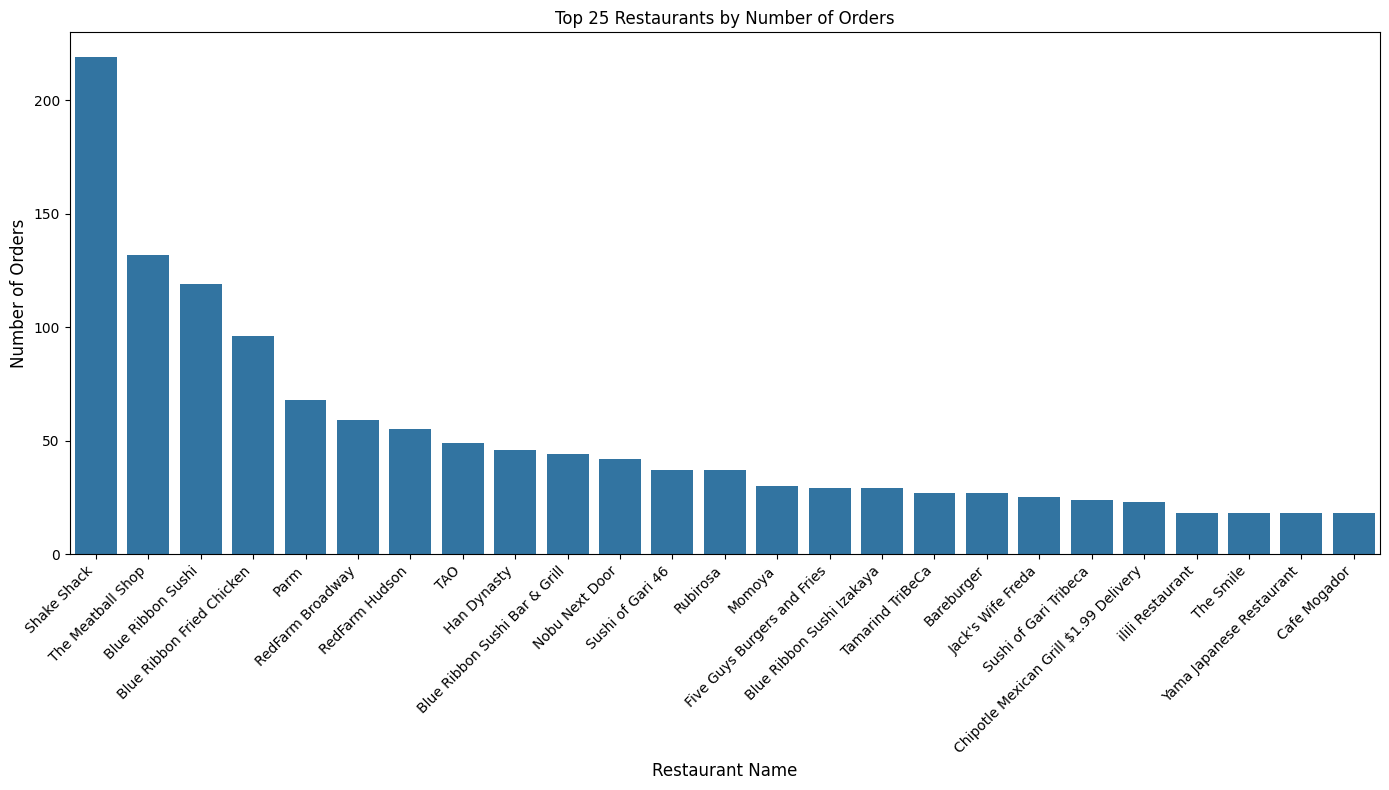

In [502]:
restaurant_orders = df['restaurant_name'].value_counts().head(25)

print("Top 25 Restaurants by Number of Orders:")
print(restaurant_orders)

plt.figure(figsize=(14, 8))
sns.barplot(x=restaurant_orders.index, y=restaurant_orders.values)
plt.title('Top 25 Restaurants by Number of Orders' )
plt.xlabel('Restaurant Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations on Cuisine_type

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


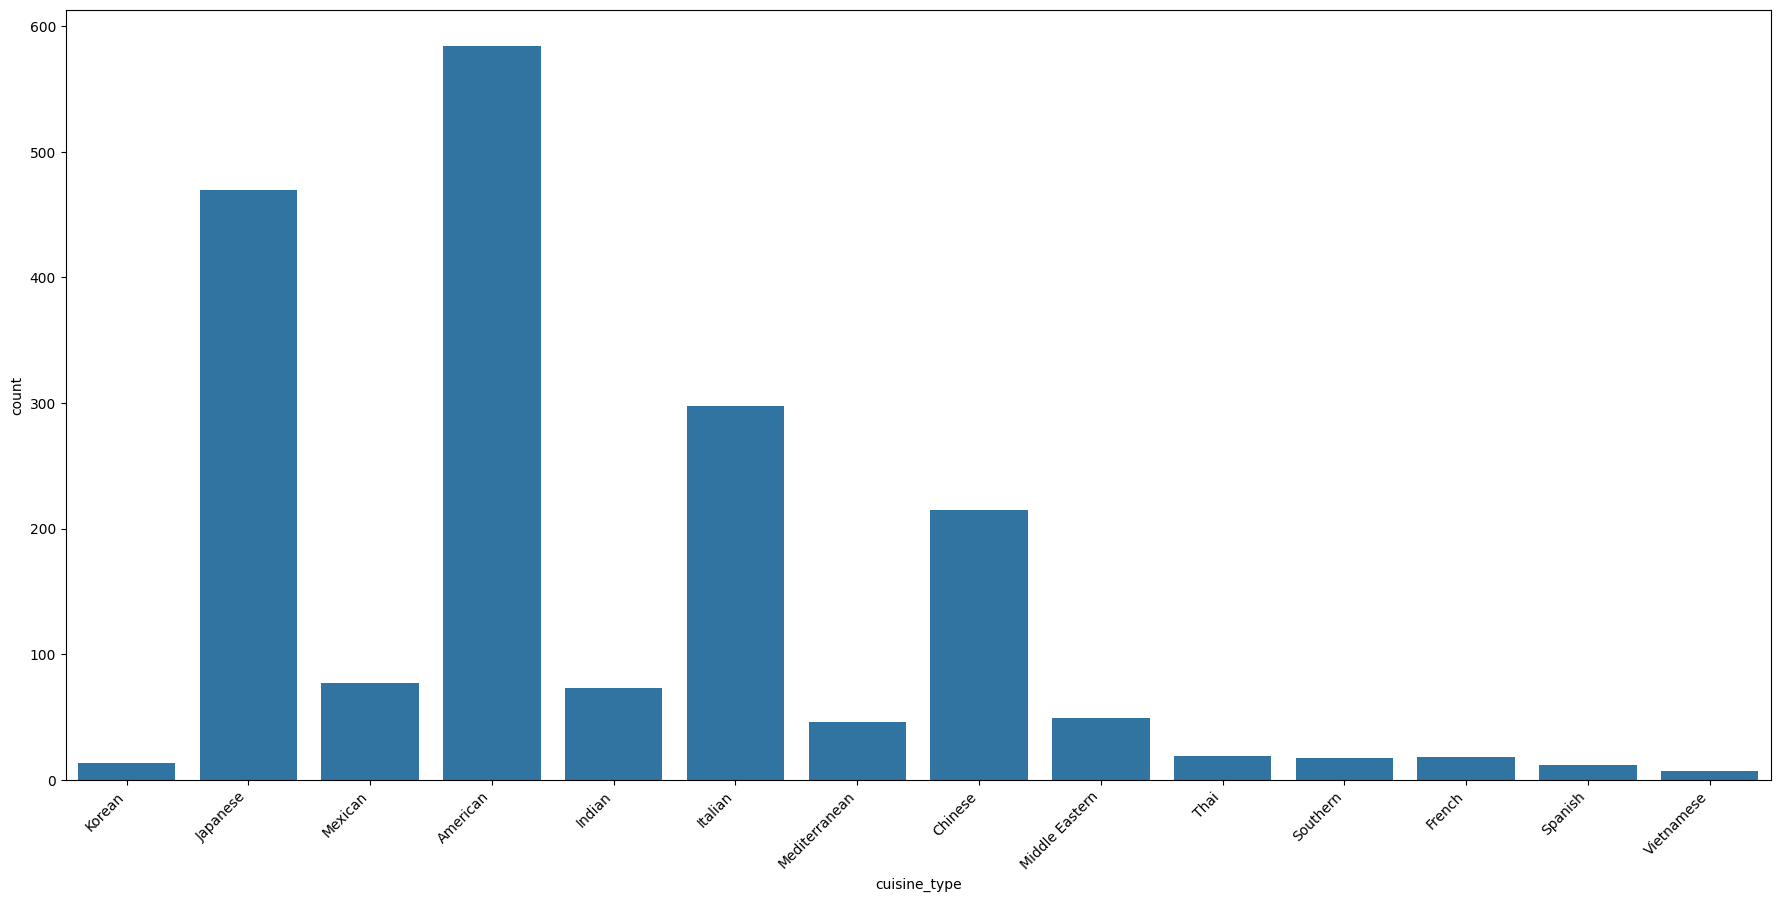

In [475]:
plt.figure(figsize=(22,10))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=45, ha='right')

cuisine_counts = df['cuisine_type'].value_counts()
print(cuisine_counts)


*Most popular: American (584 orders)*

*Least popular: Vietnamese (7 orders)*

### Observations on order volume Weekend vs Weekday

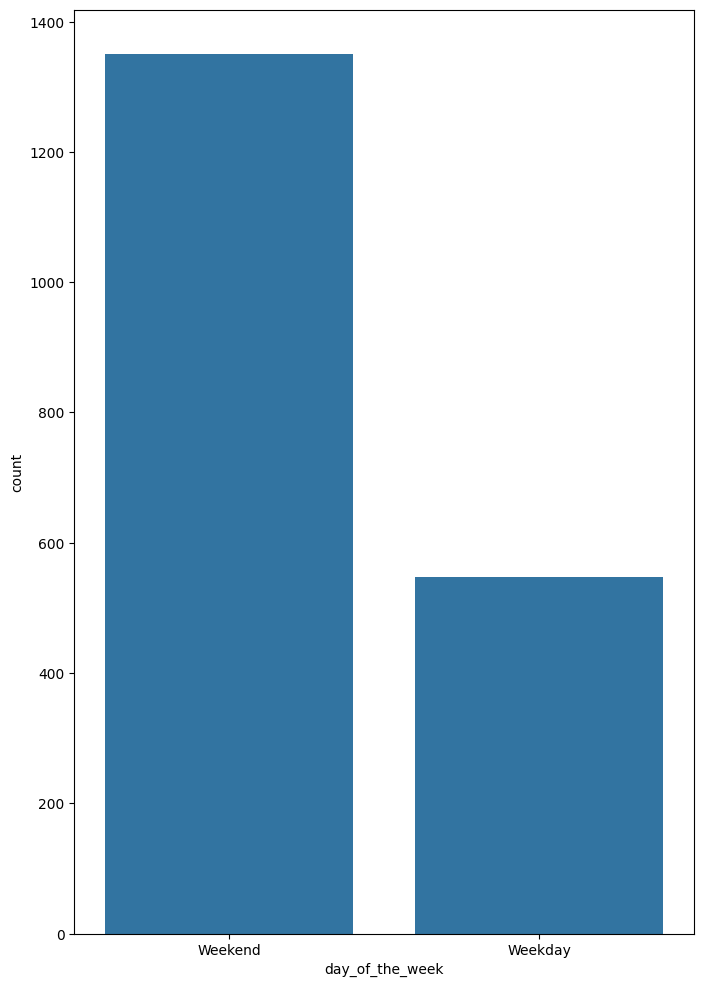

In [476]:
plt.figure(figsize=(8,12))
sns.countplot(data=df, x='day_of_the_week');
day_counts = df['day_of_the_week'].value_counts()
weekend_orders = day_counts['Weekend']
weekday_orders = day_counts['Weekday']


*Weekend orders: 1351 and percentage is: (71.18%)*

*Weekday orders: 547 and percentage is: (28.82%)*

# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [477]:
top_5 = df['restaurant_name'].value_counts().head(5)
print(top_5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [478]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [479]:
# Count orders over $20
orders_over_20 = (df['cost_of_the_order'] > 20).sum()
total_orders = len(df)
percentage = (orders_over_20 / total_orders) * 100
print(f"Percentage of the orders cost more than 20$: {percentage:.2f}%")


Percentage of the orders cost more than 20$: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [480]:
delivery_time_mean = df['delivery_time'].mean()
print(f"Mean order delivery time: {delivery_time_mean:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [481]:
# Get customer IDs and order counts
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)


# Print voucher recipients
for customer_id, orders in top_3_customers.items():
    print(f"Customer {customer_id}: {orders} orders - 20% discount voucher")

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
Customer 52832: 13 orders - 20% discount voucher
Customer 47440: 10 orders - 20% discount voucher
Customer 83287: 9 orders - 20% discount voucher


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### **LOOKING AT INDIVIDUAL VARIABLE**S

### **Cost distribution**

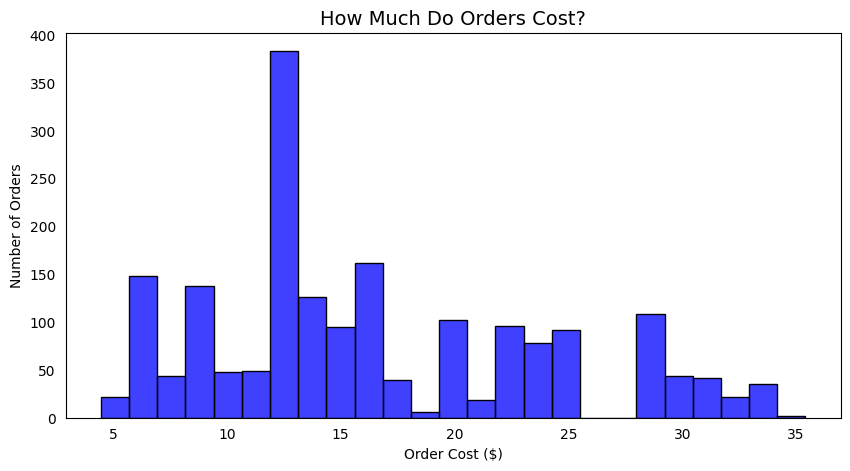

In [482]:
plt.figure(figsize=(10, 5))
sns.histplot(df['cost_of_the_order'], bins=25, color='blue')
plt.title('How Much Do Orders Cost?', size=14)
plt.xlabel('Order Cost ($)')
plt.ylabel('Number of Orders')
plt.tick_params(left=False, bottom=False)
plt.show()

*Right-skewed distribution - most orders are lower cost with a long tail of expensive orders*

### **Popular cuisines**

Text(0.5, 0, 'Number of Orders')

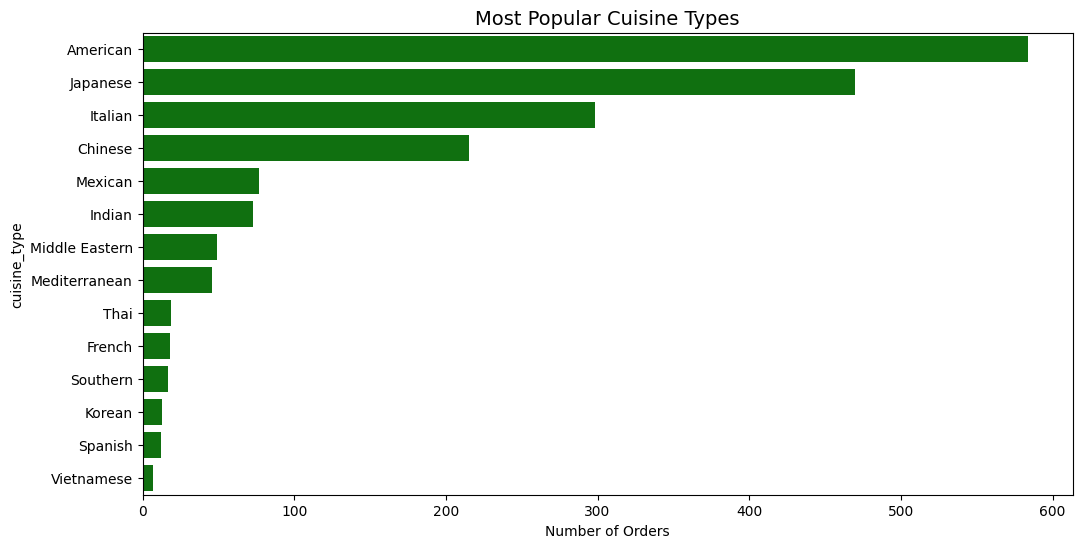

In [483]:
plt.figure(figsize=(12, 6))
top_cuisines = df['cuisine_type'].value_counts().head(25)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, color='green')
plt.title('Most Popular Cuisine Types', size=14)
plt.xlabel('Number of Orders')



*American cuisine is the most popular restaurant*

*Japanese is second popular restaurant*

*Italian ranks in number 3 position*

### **Food_preparation_time vs Delivery_time**

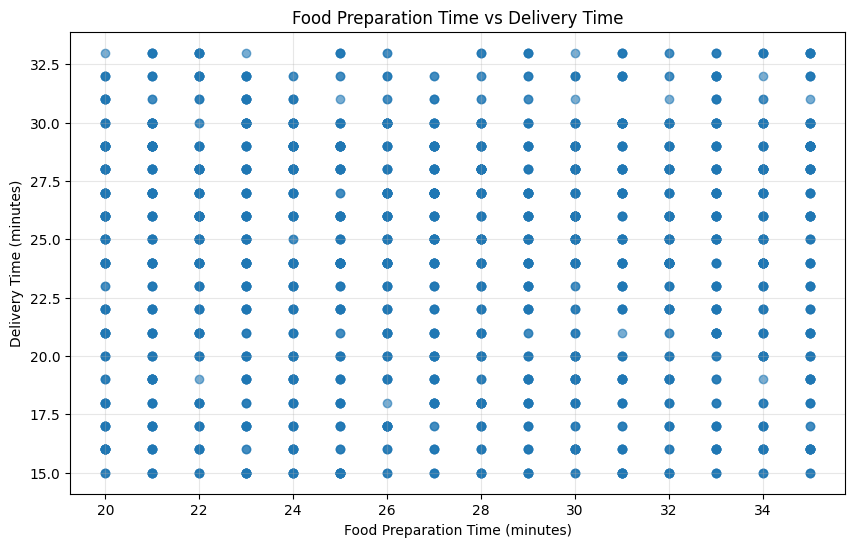

In [484]:
plt.figure(figsize=(10, 6))
plt.scatter(df['food_preparation_time'], df['delivery_time'], alpha=0.6)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Food Preparation Time vs Delivery Time')
plt.grid(True, alpha=0.3)
plt.show()

*- No Clear Relationship between prep time and delivery time*

*- Food preparation time (20-35 minutes) doesn't predict delivery time (15-33 minutes)*

### **Average delivery time by Cuisine and Average cost by cuisine**

Average stats by cuisine type:
                delivery_time  cost_of_the_order  food_preparation_time
cuisine_type                                                           
American                24.19              16.32                  27.44
Chinese                 23.86              16.31                  27.51
French                  25.33              19.79                  26.89
Indian                  24.08              16.92                  27.11
Italian                 24.57              16.42                  27.48
Japanese                24.13              16.30                  27.51
Korean                  20.92              14.00                  25.46
Mediterranean           23.59              15.47                  27.00
Mexican                 24.39              16.93                  26.73
Middle Eastern          24.08              18.82                  26.67
Southern                23.82              19.30                  27.59
Spanish                 23.42    

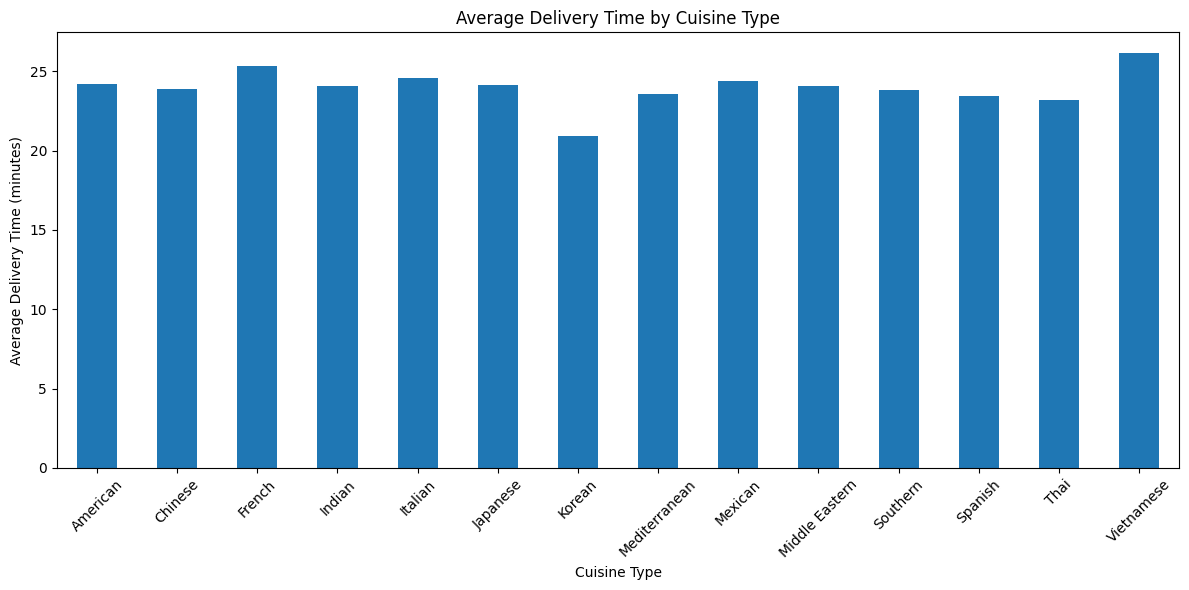

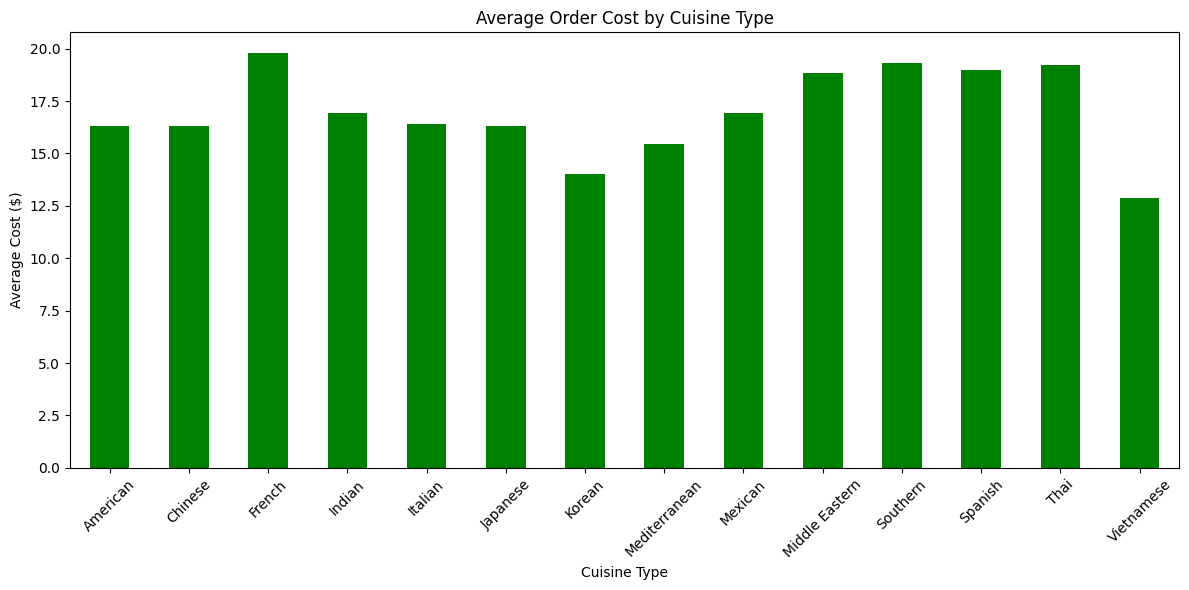

In [485]:
cuisine_stats = df.groupby('cuisine_type').agg({
    'delivery_time': 'mean',
    'cost_of_the_order': 'mean',
    'food_preparation_time': 'mean'
}).round(2)

print("Average stats by cuisine type:")
print(cuisine_stats)

plt.figure(figsize=(12, 6))
cuisine_stats['delivery_time'].plot(kind='bar')
plt.title('Average Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
cuisine_stats['cost_of_the_order'].plot(kind='bar', color='green')
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Most delivery times are very similar*

*French cuisine is most expensive (~$19.50)*

*Vietnamese is cheapest (~$12.50-13)*

### **Weekend vs weekday order costs**

Text(0, 0.5, 'Order Cost ($)')

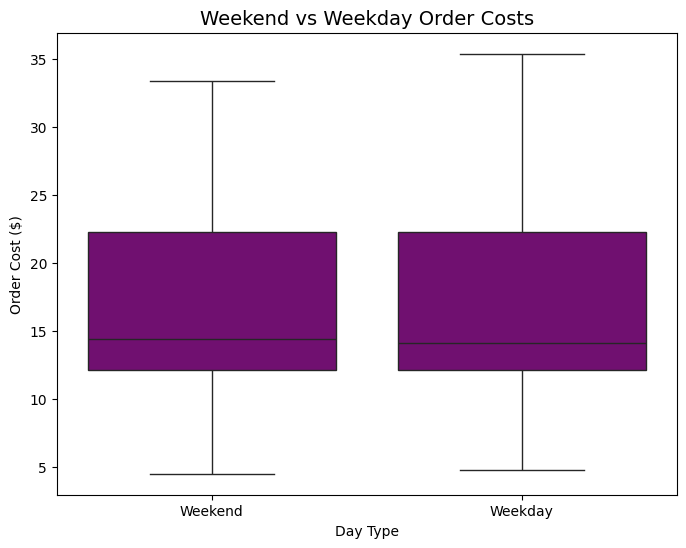

In [486]:
# Weekend vs weekday costs
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', color='purple')
plt.title('Weekend vs Weekday Order Costs', size=14)
plt.xlabel('Day Type')
plt.ylabel('Order Cost ($)')


*No significant difference in typical order cost between weekends and weekdays*

### **Total Delivery Time**

Text(0.5, 0, 'Total Time (minutes)')

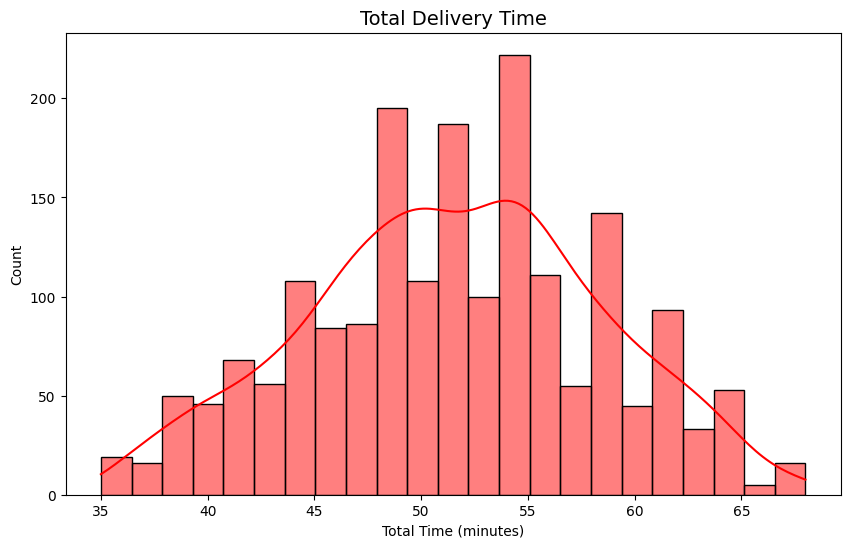

In [487]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
plt.figure(figsize=(10, 6))
sns.histplot(df['total_time'], color='red', kde=True)
plt.title('Total Delivery Time', size=14)
plt.xlabel('Total Time (minutes)')



*Normal Distribution Pattern*

*Bell-shaped curve with a clear peak around 52-53 minutes*

*Very few outliers observerd*

### **LOOKING AT MULTIPLE VARIABLES TOGETHER**





### **Cost vs Preparation Time**

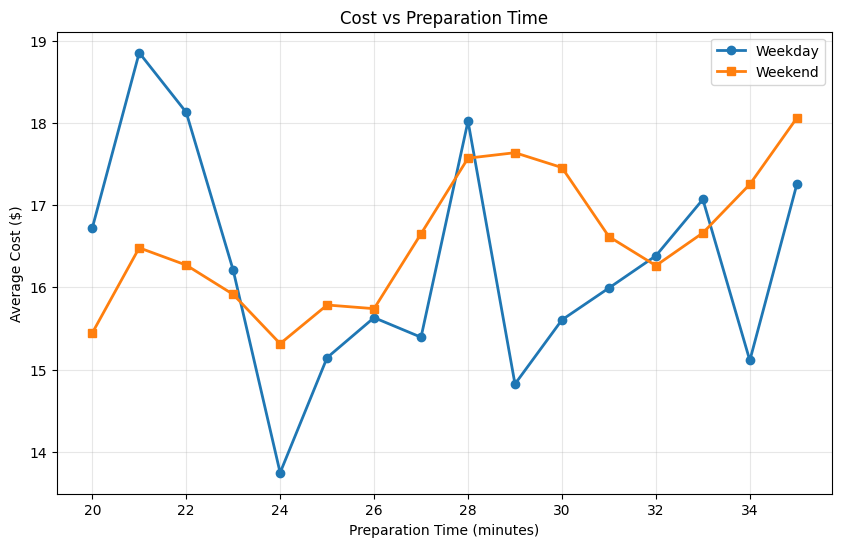

In [488]:
# Cost vs prep time, colored by day type
# Group by prep time and day type, calculate average cost
avg_cost = df.groupby(['food_preparation_time', 'day_of_the_week'])['cost_of_the_order'].mean().unstack()

plt.figure(figsize=(10, 6))
avg_cost['Weekday'].plot(marker='o', linewidth=2, label='Weekday')
avg_cost['Weekend'].plot(marker='s', linewidth=2, label='Weekend')

plt.title('Cost vs Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Average Cost ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### **Orders by restaurant and day**

Orders by restaurant and day:
                 restaurant_name day_of_the_week  order_count
0                     Bareburger         Weekday            7
1                     Bareburger         Weekend           20
2      Blue Ribbon Fried Chicken         Weekday           22
3      Blue Ribbon Fried Chicken         Weekend           74
4              Blue Ribbon Sushi         Weekday           34
5              Blue Ribbon Sushi         Weekend           85
6  Blue Ribbon Sushi Bar & Grill         Weekday           15
7  Blue Ribbon Sushi Bar & Grill         Weekend           29
8      Blue Ribbon Sushi Izakaya         Weekday            8
9      Blue Ribbon Sushi Izakaya         Weekend           21


<Figure size 1600x800 with 0 Axes>

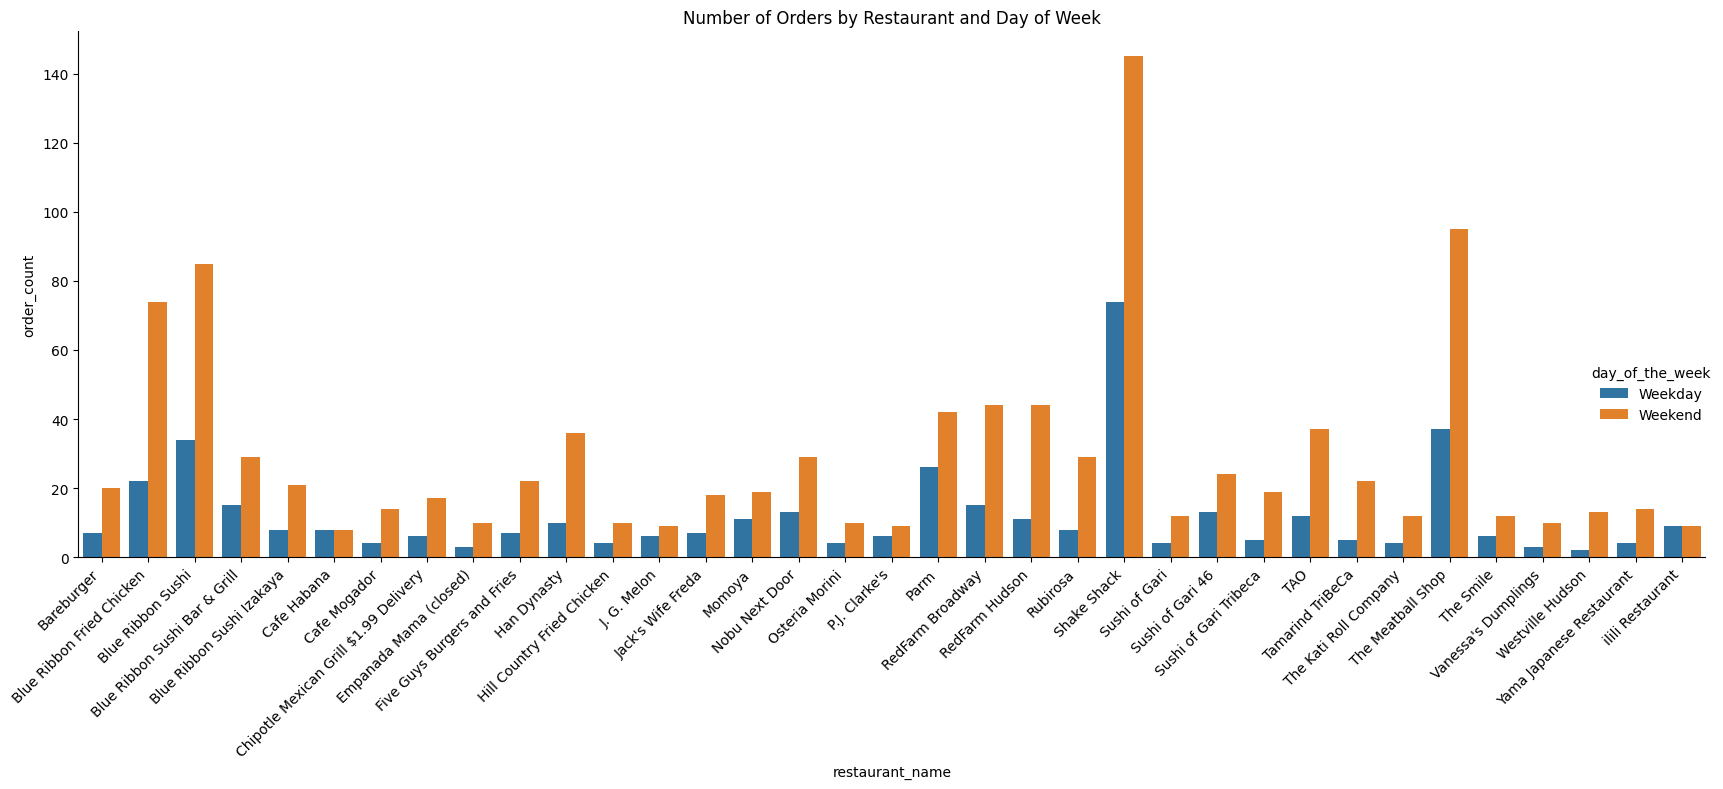

In [489]:
top_restaurants = df['restaurant_name'].value_counts().head(35).index
df_top = df[df['restaurant_name'].isin(top_restaurants)]

# Count orders by restaurant and day of week
orders_by_restaurant_day = df_top.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='order_count')

print("Orders by restaurant and day:")
print(orders_by_restaurant_day.head(10))

# Create simple catplot
plt.figure(figsize=(16, 8))
sns.catplot(data=orders_by_restaurant_day,
            x='restaurant_name',
            y='order_count',
            hue='day_of_the_week',
            kind='bar',
            height=8,
            aspect=2)

plt.xticks(rotation=45, ha='right')
plt.title('Number of Orders by Restaurant and Day of Week')
plt.tight_layout()
plt.show()

*Most restaurants show more weekend orders than weekday orders*

*Orange bars (Weekend) are consistently much taller than blue bars (Weekday)*

### **Simple correlation heatmap**

Text(0.5, 1.0, 'How Variables Relate to Each Other')

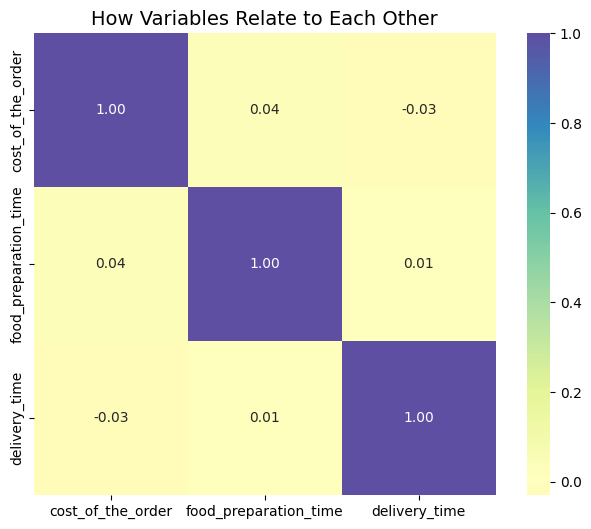

In [490]:
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='Spectral', center=0,
            square=True, fmt='.2f')
plt.title('How Variables Relate to Each Other', size=14)

*Cost vs Prep Time: 0.04 (essentially no relationship)*

*Cost vs Delivery Time: -0.03 (essentially no relationship)*

*Prep Time vs Delivery Time: 0.01 (essentially no relationship)*

### **Rating analysis**

Text(0, 0.5, 'Number of Orders')

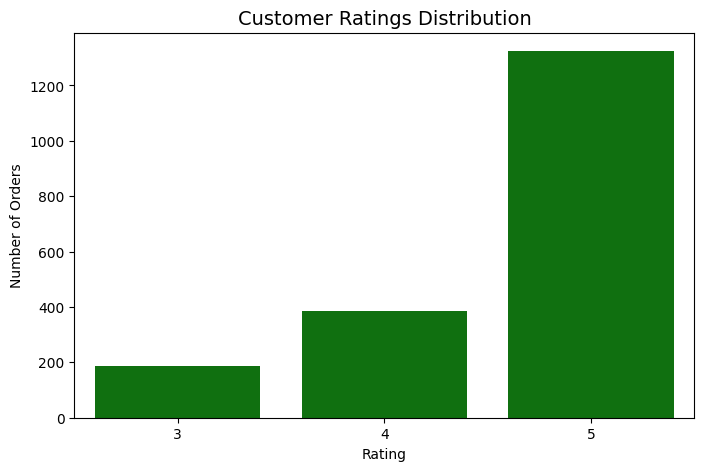

In [491]:
plt.figure(figsize=(8, 5))
valid_ratings = df['rating'].dropna()
rating_counts = valid_ratings.value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='green')
plt.title('Customer Ratings Distribution', size=14)
plt.xlabel('Rating')
plt.ylabel('Number of Orders')




### **Average preparation time by cuisine**

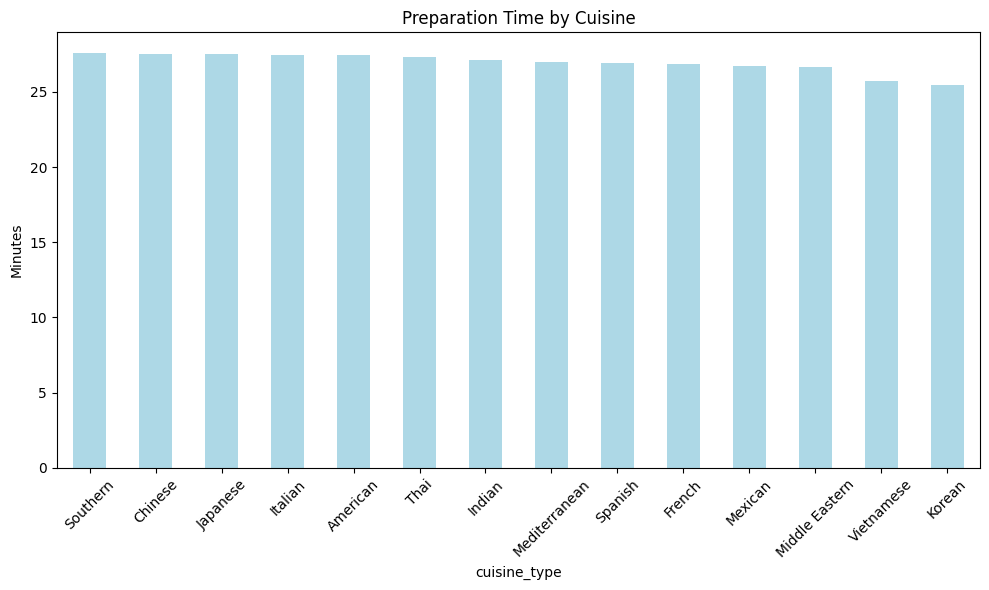

In [492]:
# Calculate average preparation time by cuisine
avg_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_prep_time.plot(kind='bar', color='lightblue')
plt.title('Preparation Time by Cuisine')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Consistent Preparation Times across all Cuisines*

### **Outlier Detection and Treatment**


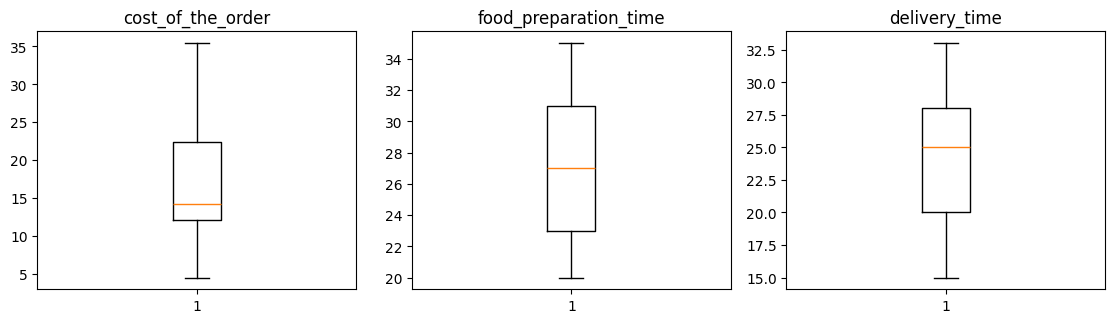

In [493]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*No Outliers detected*

### **Cost and prep time correlation**

In [494]:
cost_prep_corr = df['cost_of_the_order'].corr(df['food_preparation_time'])
print(f"• Cost and prep time correlation: {cost_prep_corr:.2f} (close to 0 = no strong relationship)")

# Check how many ratings we actually have
total_ratings = len(df['rating'].dropna())
print(f"• Number of orders with ratings: {total_ratings} out of {total_orders}")

• Cost and prep time correlation: 0.04 (close to 0 = no strong relationship)
• Number of orders with ratings: 1898 out of 1898


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [495]:
df = df[df['rating'] != 'Not given']
df['rating'] = pd.to_numeric(df['rating'])

# Group by restaurant and get count and average
result = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).round(2)

# Filter restaurants with >50 ratings and >4.0 average
qualified = result[(result['count'] > 50) & (result['mean'] > 4.0)]

print("Qualified Restaurants:")
print(qualified)

Qualified Restaurants:
                           count  mean
restaurant_name                       
Blue Ribbon Fried Chicken     96  4.55
Blue Ribbon Sushi            119  4.52
Parm                          68  4.50
RedFarm Broadway              59  4.47
RedFarm Hudson                55  4.49
Shake Shack                  219  4.56
The Meatball Shop            132  4.69


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [496]:
def commission(cost):
    if cost > 20: return cost * 0.25
    elif cost > 5: return cost * 0.15
    else: return 0

revenue = df['cost_of_the_order'].apply(commission).sum()
print(revenue)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [497]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
over_60 = (df['total_time'] > 60).sum()
total_orders = len(df)
percentage = (over_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [498]:
df['delivery_time_weekday'] = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
df['delivery_time_weekend'] = df[df['day_of_the_week'] == 'Weekend']['delivery_time']

mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {mean_delivery_time_weekday:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_delivery_time_weekend:.2f} minutes")

mean_difference = mean_delivery_time_weekday - mean_delivery_time_weekend
print(f"Mean difference between weekdays and weekends: {mean_difference:.2f} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes
Mean difference between weekdays and weekends: 5.87 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions



1. Most popular cuisine: American
2. Second popular cuisine: Japanese food
3. Average order cost: $16.50
4. Most orders on: Weekend
5. Average preparation time: 27.4 minutes
6. Average delivery time: 24.2 minutes
7. Top restaurant: Shake Shack with 219 orders
8. Most expensive cuisine is French                  
9. Least expensive cuisine is Vietnamese
10. Order cost doesn't strongly correlate with prep time

### Recommendations:
1. Boost Customer Engagement by sending follow-up texts or emails asking for quick ratings. With 39% of orders unrated, we are missing valuable insights and even a 10% increase in rating participation will give better data.

2. Capture Weekday Market. Roughly 30% of orders happen on weekdays - which means there is a huge growth opportunity. Business can be improved by launching Weekday lunch Specials targeting office workers and by marketing healthy, quick options as well.

3. Focus on Star Performers by giving special promotions to the 4 qualifying restaurants as they have proven track record of good ratings and high volume.

4. Promoting one underperforming high-satisfaction cuisine each week like Spanish, Thai, and Indian cuisines who has the highest ratings but fewer orders.

4. Fixing Slow Deliveries by setting 60-minute maximum delivery target.

5. Monitor restaurants that consistently take too long. Give customers better time estimates. Happier customers, means more repeat orders.

4. Give longer time estimates for complex cuisines. Suggesting faster cuisines during busy times by suggesting 'Express Menu' options in the app.

5. Charge slightly more for highly-rated restaurants. Offer discounts for faster cuisines.

6. Weekend vs weekday pricing for Better profit margins.

---